In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
student_data = pd.read_csv('C:/Users/saich/Desktop/Janani/Projects/Exploratory analysis_python/Students.csv')

In [4]:
# Understanding the data
student_data.head() # first 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
student_data.tail() # last 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
student_data.shape # shape (row,column)

(1000, 8)

In [8]:
student_data.describe() 

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
student_data.columns # names of columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [10]:
student_data.nunique() # number of unique values in each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
student_data['gender'].unique() # values in a specific column

array(['female', 'male'], dtype=object)

In [13]:
# Data cleaning
student_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [15]:
student_modified = student_data.drop(['parental level of education','race/ethnicity'], axis=1)

In [17]:
student_modified.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [18]:
# Analysis of relationship between variables
# corr() is used to find the pairwise correlation of all columns in the dataframe.
correlation = student_modified.corr()
correlation

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


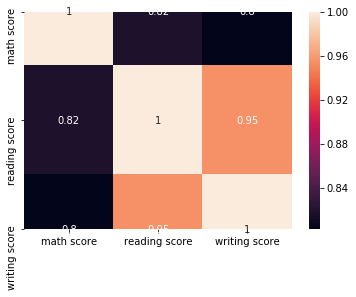

In [23]:
# A good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.
# Heatmaps are typically used to visualize correlation matrices.
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True) #annot - If True, write the data value in each cell

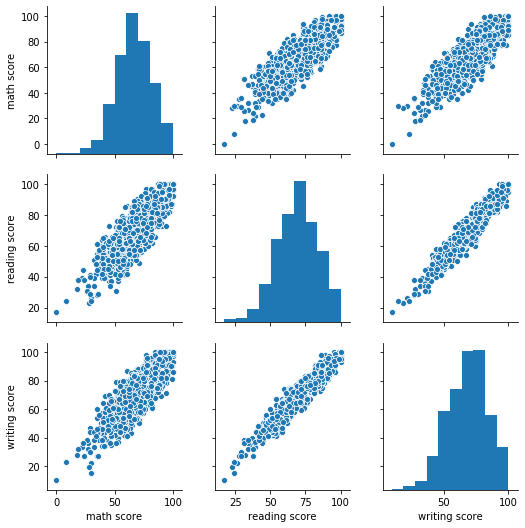

In [24]:
sns.pairplot(student_modified) #Plot pairwise relationships in a dataset.

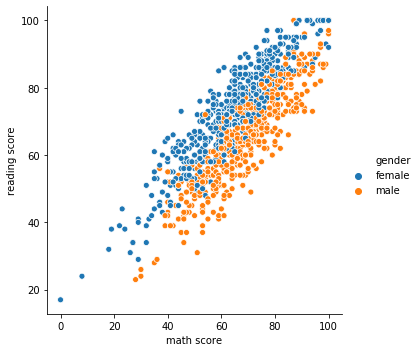

In [25]:
# relplot - Plot data and a linear regression model fit.
sns.relplot(x = 'math score', y = 'reading score', hue = 'gender', data=student_modified)  

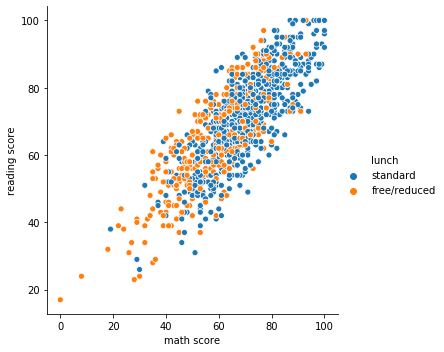

In [26]:
sns.relplot(x = 'math score', y = 'reading score', hue = 'lunch', data=student_modified) 

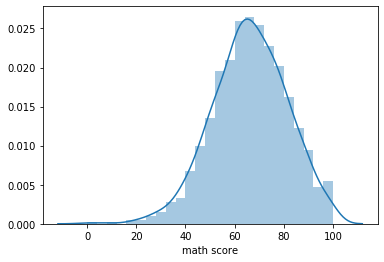

In [27]:
# distplot - Flexibly plot a univariate distribution of observations.
sns.distplot(student_modified['math score']) # majority of people have scored between 60 & 70

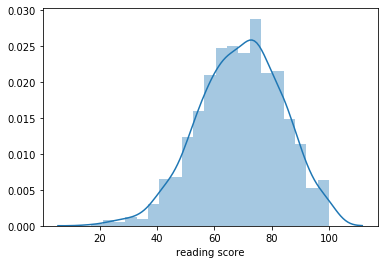

In [28]:
sns.distplot(student_modified['reading score'])

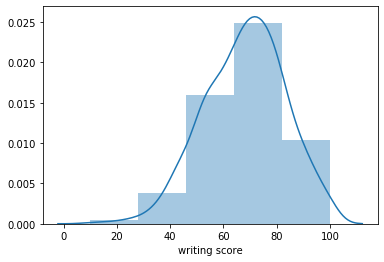

In [29]:
sns.distplot(student_modified['writing score'], bins=5) # bins - shows the distribution with 5 divisons

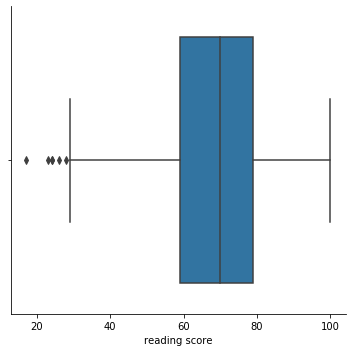

In [30]:
#catplot -  for drawing categorical plots
# Draw a box plot to show distributions with respect to categories.
sns.catplot(x = 'reading score', kind = 'box', data = student_modified)